In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import copy

In [2]:
df =  pd.read_csv('baitap.csv')
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [3]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

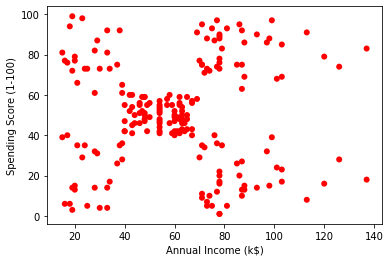

In [4]:
def plot(df):
    annual_income = df.iloc[:, 0]
    spending_score = df.iloc[:, 1]
    plt.scatter(x = annual_income, y= spending_score, color='red', edgecolor='none')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
plot(df)  

In [5]:
X = df.values
K = 5

## Implement

In [6]:
def create_centers(X):
    indicates = np.random.randint(0, len(X), size = K)
    initial_centers =  X[indicates]
    return initial_centers

centers = create_centers(X)
centers = {i: value for i, value in enumerate(centers)}
centers

{0: array([88, 69], dtype=int64),
 1: array([71,  9], dtype=int64),
 2: array([46, 46], dtype=int64),
 3: array([46, 55], dtype=int64),
 4: array([78, 76], dtype=int64)}

In [7]:
def fit(X, max_iter, epsilon, centers):
    count = 0
    while count < max_iter:
        features = {cluster: [] for cluster in range(K)}
        for x in X:
            distances = [np.linalg.norm(x-centers[center]) for center in centers]
            nearest = np.argmin(distances)  #chỉ số
            features[nearest].append(x)
        
        old_centers = copy.deepcopy(centers)
        is_optimal = False
        for center in centers:
            centers[center] = np.mean(features[center], axis = 0)
            if np.abs(centers[center]- old_centers[center]).all() < epsilon:
                is_optimal = True
        
        if is_optimal:
            break
        count +=1
    return centers

centers = fit(X, max_iter=100, epsilon=1e-4, centers=centers)
centers

{0: array([109.7,  82. ]),
 1: array([87.        , 18.63157895]),
 2: array([46.89473684, 38.93421053]),
 3: array([39.08695652, 67.65217391]),
 4: array([78.23333333, 81.36666667])}

## Sử dụng thư viện

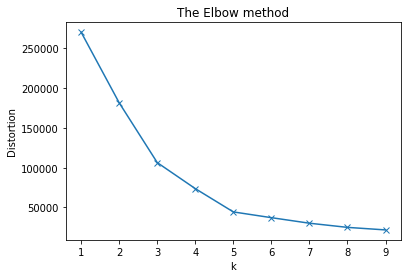

In [8]:
def elbow(X, fixed_k):
    distortions = []
    for k in fixed_k:
        cluster = KMeans(n_clusters=k)
        cluster.fit(X)
        distortions.append(cluster.inertia_)
    plt.plot(fixed_k, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow method')

elbow(X, range(1, 10))

In [9]:
cluster = KMeans(n_clusters=K)
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
score = silhouette_score(X, cluster.labels_)
print('Score:', score)

Score: 0.553931997444648
